<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-1-Data-Preprocessing" data-toc-modified-id="Part-1-Data-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 1 Data Preprocessing</a></span></li><li><span><a href="#Part-2-Graphs" data-toc-modified-id="Part-2-Graphs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 2 Graphs</a></span></li><li><span><a href="#Part-3-AdaBoost" data-toc-modified-id="Part-3-AdaBoost-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Part 3 AdaBoost</a></span></li><li><span><a href="#Part-4-(SVM)" data-toc-modified-id="Part-4-(SVM)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Part 4 (SVM)</a></span><ul class="toc-item"><li><span><a href="#Plotting-Decision-Boundries" data-toc-modified-id="Plotting-Decision-Boundries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plotting Decision Boundries</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Hard-Voting-Classifiers" data-toc-modified-id="Hard-Voting-Classifiers-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Hard Voting Classifiers</a></span></li><li><span><a href="#Convex-Optimization" data-toc-modified-id="Convex-Optimization-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Convex Optimization</a></span></li></ul></li></ul></div>

<font color="orange" size=5>
    Sajad Rahmanian 
    <br/>
    97101683
    <br />
    PHW3
</font>

In [1]:
import pandas as pd
import numpy as np
# Loading Data
df = pd.read_csv("./JuiceQuality.csv", index_col=0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,A Indx,density,pH,sulphates,Vit Indx,quality,Type
0,5.9,0.32,0.39,low,0.114,24.0,140.0,13.905151,0.99340,3.09,low,very_low,high,Lemon_Juice
1,7.8,0.24,0.18,high,0.046,33.0,160.0,17.130070,0.99630,3.20,medium,low,high,Lemon_Juice
2,7.7,0.58,0.01,very_low,0.088,12.0,18.0,15.618966,0.99568,NaN,medium,low,high,Orange_Juice
3,8.3,0.18,0.30,very_low,0.033,20.0,57.0,18.085322,0.99109,3.02,medium,medium,high,Lemon_Juice
4,6.5,NaN,0.31,very_low,0.044,NaN,127.0,13.968160,0.99280,3.49,low,low,high,Lemon_Juice


## Part 1 Data Preprocessing
Replace all the nan values in "PH" feature using "sulphates" feature. 

<font color="orange">
    1. Filling null values of sulphates using its mode.
    <br />
    2. Filling null values of other columns using groupby sulphates('A Indx' and 'quality' are left for next parts).
    <br />
    3. Filling null values of categorical data with their mode.
    <br />
    4. Converting categorical data to numerical using One Hot method explained later('Vit Indx' and 'sulphates' are left for next parts)
    <br />
</font>

In [2]:
# Uncomment the following line if you don't have category_encoders package installed.
df['sulphates'].fillna(df['sulphates'].mode()[0], inplace=True)

# Filling null values using 'sulphates'
df['pH'].fillna(df.groupby('sulphates')['pH'].transform('mean'), inplace=True)

# Doing the same method for other columns which are needed for next parts:
df['fixed acidity'].fillna(df.groupby('sulphates')['fixed acidity'].transform('mean'), inplace=True)
df['citric acid'].fillna(df.groupby('sulphates')['citric acid'].transform('mean'), inplace=True)
df['chlorides'].fillna(df.groupby('sulphates')['chlorides'].transform('mean'), inplace=True)
df['volatile acidity'].fillna(df.groupby('sulphates')['volatile acidity'].transform('mean'), inplace=True)
df['free sulfur dioxide'].fillna(df.groupby('sulphates')['free sulfur dioxide'].transform('mean'), inplace=True)
df['total sulfur dioxide'].fillna(df.groupby('sulphates')['total sulfur dioxide'].transform('mean'), inplace=True)
df['density'].fillna(df.groupby('sulphates')['density'].transform('mean'), inplace=True)
# Replacing null values of Vit Indx with the column's mode:
df['Vit Indx'].fillna(df['Vit Indx'].mode()[0], inplace=True)
# Replacing 'residual sugar null values with its mode.
df['residual sugar'].fillna(df['residual sugar'].mode()[0], inplace=True)
dff = df.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,A Indx,density,pH,sulphates,Vit Indx,quality,Type
0,5.9,0.320000,0.39,low,0.114,24.000000,140.0,13.905151,0.99340,3.090000,low,very_low,high,Lemon_Juice
1,7.8,0.240000,0.18,high,0.046,33.000000,160.0,17.130070,0.99630,3.200000,medium,low,high,Lemon_Juice
2,7.7,0.580000,0.01,very_low,0.088,12.000000,18.0,15.618966,0.99568,3.256431,medium,low,high,Orange_Juice
3,8.3,0.180000,0.30,very_low,0.033,20.000000,57.0,18.085322,0.99109,3.020000,medium,medium,high,Lemon_Juice
4,6.5,0.301384,0.31,very_low,0.044,33.682311,127.0,13.968160,0.99280,3.490000,low,low,high,Lemon_Juice


In [3]:
# Because we want to add only 2 columns for each feature, least frequent value of categorical features is deleted.
# Note: DO NOT run this block unless previous blocks have been run.
df = df[df['Vit Indx'] != df['Vit Indx'].value_counts().index[-1]].copy()
df = df[df['residual sugar'] != df['residual sugar'].value_counts().index[-1]].copy()

In [4]:
mapdict = {"very_low":0, "low":1, "medium":2, "high":3}
mapdict2 = {"very_low":0, "low":1, "high":2, "very_high":3}
mapdict3 = {"low":0, "medium":1, "high":2, "very_high":3}
mapdict4 = {0:0, 1:1, 2:0, 3:1}
mapdict5 = {0:0, 1:0, 2:1, 3:1}
df['vitco'] = df['Vit Indx'].map(mapdict)
df['resco'] = df['residual sugar'].map(mapdict2)
df['suco'] = df['sulphates'].map(mapdict3)
df['vit_0'] = df['vitco'].map(mapdict4)
df['vit_1'] =df['vitco'].map(mapdict5)
df['residual_0'] = df['resco'].map(mapdict4)
df['residual_1'] = df['resco'].map(mapdict5)
df['sulphates_0'] = df['suco'].map(mapdict4)
df['sulphates_1'] = df['suco'].map(mapdict5)
df['target'] = df['quality'].map({"high":1, "low":0})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,A Indx,density,pH,...,vitco,resco,suco,vit_0,vit_1,residual_0,residual_1,sulphates_0,sulphates_1,target
0,5.9,0.320000,0.39,low,0.114,24.000000,140.0,13.905151,0.99340,3.090000,...,0,1,0,0,0,1,0,0,0,1.0
1,7.8,0.240000,0.18,high,0.046,33.000000,160.0,17.130070,0.99630,3.200000,...,1,2,1,1,0,0,1,1,0,1.0
2,7.7,0.580000,0.01,very_low,0.088,12.000000,18.0,15.618966,0.99568,3.256431,...,1,0,1,1,0,0,0,1,0,1.0
3,8.3,0.180000,0.30,very_low,0.033,20.000000,57.0,18.085322,0.99109,3.020000,...,2,0,1,0,1,0,0,1,0,1.0
4,6.5,0.301384,0.31,very_low,0.044,33.682311,127.0,13.968160,0.99280,3.490000,...,1,0,0,1,0,0,0,0,0,1.0


Use Linear Regression to fill out nan values. "A Indx" feature is presumed as a Label and "fixed acidity", "citric acid" and " chlorides" are our features. You can use any of the mentioned features to estimate nan values in Label. 

<font color="orange">
    In order to determine the best features we could use two methods:
    <br/>
       1) Using correlation of features with the target variable.
    <br/>
        2) Using error of train/test 
    <br/>

In [5]:
mask = df['A Indx'].isnull()
df[['fixed acidity', 'citric acid', 'chlorides', 'A Indx']][~mask].corr()

,fixed acidity,citric acid,chlorides,A Indx
fixed acidity,1.000000,0.303162,0.286245,0.957484
citric acid,0.303162,1.000000,0.044656,0.426600
chlorides,0.286245,0.044656,1.000000,0.290577
A Indx,0.957484,0.426600,0.290577,1.000000


<font color="orange">
    Above results show that 'fixed acidity' is the best featuer to use (in sense of maximum correlation).
    Thus we only use this feature to estimate null values of 'A Indx' and compare it to using all features.
</font>

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

regressor = LinearRegression()
X = df[['fixed acidity']][~mask]
y = df[['A Indx']][~mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_pred = regressor.fit(X_train, y_train).predict(X_test)
mse1 = mse(y_test, y_pred)

X = df[['fixed acidity', 'citric acid', 'chlorides']][~mask]
y = df[['A Indx']][~mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_pred = regressor.fit(X_train, y_train).predict(X_test)
mse2 = mse(y_test, y_pred)
print("estimation mse using only 'fixed acidity': ", mse1)
print("estimation mse using all three features: ", mse2)

mask = dff['A Indx'].isnull()
X = dff[['fixed acidity', 'citric acid', 'chlorides']][mask]
Y = regressor.fit(dff[['fixed acidity', 'citric acid', 'chlorides']][~mask], dff[['A Indx']][~mask]).predict(X)
dff.loc[mask, 'A Indx'] = Y.reshape((-1,))

estimation mse using only 'fixed acidity':  0.7182681541547609
estimation mse using all three features:  0.4954799305682378


<font color="orange">
    According to above results using all three featuers has a slightly better accuracy.
</font>

Use the categorial features like "Vit Indx" to estimate nan values in " A Indx" feature. 

<font color="orange">
    Why not 0,1,... coding? Because categorical varibles most of the time are nominal which means they don't have any order, but using 0,1,... implies oreder in the values which is okay for ordinal variables but not for nominal. Here since there is some order in our features very_low $<$ low $<$ medium $<$ ... it's okay to use 0,1,2,... encoding too.
</font>

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

mask = df['A Indx'].isnull() 
iterations = 200
lr = LinearRegression()
s1 = 0
s2 = 0
s3 = 0
s4 = 0
s5 = 0
s6 = 0
for _ in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(df[['vit_0', 'vit_1']][~mask], df['A Indx'][~mask], test_size=0.2)
    y_pred = lr.fit(X_train, y_train).predict(X_test)
    s1 += mse(y_test, y_pred)

    X_train, X_test, y_train, y_test = train_test_split(df[['residual_0', 'residual_1']][~mask], df['A Indx'][~mask], test_size=0.2)
    y_pred = lr.fit(X_train, y_train).predict(X_test)
    s2 += mse(y_test, y_pred)

    X_train, X_test, y_train, y_test = train_test_split(df[['sulphates_0', 'sulphates_1']][~mask], df['A Indx'][~mask], test_size=0.2)
    y_pred = lr.fit(X_train, y_train).predict(X_test)
    s3 += mse(y_test, y_pred)
    
    X_train, X_test, y_train, y_test = train_test_split(df[['vitco']][~mask], df['A Indx'][~mask], test_size=0.2)
    y_pred = lr.fit(X_train, y_train).predict(X_test)
    s4 += mse(y_test, y_pred)

    X_train, X_test, y_train, y_test = train_test_split(df[['resco']][~mask], df['A Indx'][~mask], test_size=0.2)
    y_pred = lr.fit(X_train, y_train).predict(X_test)
    s5 += mse(y_test, y_pred)
    
    X_train, X_test, y_train, y_test = train_test_split(df[['suco']][~mask], df['A Indx'][~mask], test_size=0.2)
    y_pred = lr.fit(X_train, y_train).predict(X_test)
    s6 += mse(y_test, y_pred)
print("Estimating A Indx using Vit Indx mse: ", s1/iterations)
print("Estimating A Indx using residual sugar mse: ", s2/iterations)
print("Estimating A Indx using sulphates mse: ", s3/iterations)
print("Estimating A Indx using Vit Indx coded 0,1,2,3 mse: ", s4/iterations)
print("Estimating A Indx using residual sugar coded 0,1,2,3 mse: ", s5/iterations)
print("Estimating A Indx using sulphates coded 0,1,2,3 mse: ", s6/iterations)

Estimating A Indx using Vit Indx mse:  8.124596634256005
Estimating A Indx using residual sugar mse:  7.787676298522496
Estimating A Indx using sulphates mse:  7.723569614860114
Estimating A Indx using Vit Indx coded 0,1,2,3 mse:  8.118917944619195
Estimating A Indx using residual sugar coded 0,1,2,3 mse:  8.191110320199437
Estimating A Indx using sulphates coded 0,1,2,3 mse:  7.7071499703061805


<font color="orange">
    Estimating A Indx using sulphates in binary has the smallest mse. But since adding too many features increases learning runtime let's continue with 0,1,2,... encodeing.
</font>

In [8]:
df.loc[mask, 'A Indx'] = lr.fit(df[['sulphates_0', 'sulphates_1']][~mask], df['A Indx'][~mask]).predict(
                        df[['sulphates_0', 'sulphates_1']][mask])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5870 entries, 0 to 6496
Data columns (total 24 columns):
fixed acidity           5870 non-null float64
volatile acidity        5870 non-null float64
citric acid             5870 non-null float64
residual sugar          5870 non-null object
chlorides               5870 non-null float64
free sulfur dioxide     5870 non-null float64
total sulfur dioxide    5870 non-null float64
A Indx                  5870 non-null float64
density                 5870 non-null float64
pH                      5870 non-null float64
sulphates               5870 non-null object
Vit Indx                5870 non-null object
quality                 5561 non-null object
Type                    5577 non-null object
vitco                   5870 non-null int64
resco                   5870 non-null int64
suco                    5870 non-null int64
vit_0                   5870 non-null int64
vit_1                   5870 non-null int64
residual_0              5870 non-n

## Part 2 Graphs and Stats

In [9]:
print("Statistics in groups: ")
print("Mean:\n", dff.groupby('quality').mean())
print("\n\n\nMode:\n", dff.groupby('quality').apply(lambda x: x.mode().iloc[0]))
print("\n\n\nVariance:\n", dff.groupby('quality').var())
print("\n\n\nMedian:\n", dff.groupby('quality').median())
print("\n\n\n\nStatistics in total: ")
print("Mean:\n", dff.mean())
print("\n\n\nMode:\n", dff.apply(lambda x: x.mode().iloc[0]))
print("\n\n\nVariance:\n", dff.var())
print("\n\n\nMedian:\n", dff.median())

Statistics in groups: 
Mean:
          fixed acidity  volatile acidity  citric acid  chlorides  \
quality                                                            
high          7.161163          0.307501     0.327099   0.051190   
low           7.326974          0.394783     0.303849   0.064101   

         free sulfur dioxide  total sulfur dioxide     A Indx   density  \
quality                                                                   
high               30.987060            113.975327  15.927231  0.994118   
low                29.633194            118.528662  16.274342  0.995694   

               pH  
quality            
high     3.219195  
low      3.213540  



Mode:
 0        fixed acidity  volatile acidity  citric acid residual sugar  \
quality                                                                
high               6.8              0.24         0.30       very_low   
low                6.4              0.28         0.26       very_low   

0        chloride

<font color="orange">
Above results show:
    High quality juice has smaller 'fixed acidity', 'volatile acidity', 'cholorides', 'total sulfur dioxide', 'A Indx' and 'density'. On the contrary it has greater 'citric acid', 'free sulfur dioxide' and 'pH'. Also note that mode of 'sulphate' and 'residual sugar' and 'Vit Indx' is the same for both qualities.
</font>

Plot Bar Graph for the "sulphates" feature for high and low quality juice.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

mask = df['quality'].isnull()

data = df[df.columns][~mask]
# define axis and labels 
plt.figure(figsize=(5, 5))
sns.countplot(x="sulphates", hue="quality", data=data)
plt.title("Bar graph for the 'sulphates'")
plt.show()

<Figure size 500x500 with 1 Axes>

Plot Box plot for "chlorides" feature for 4 "sulphates" group of labels and two high and low quality juice. 

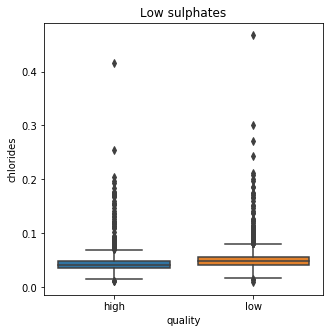

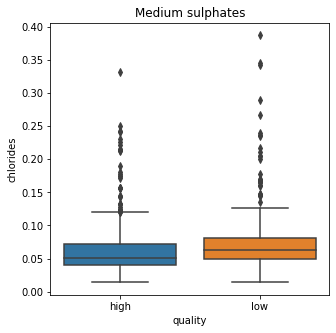

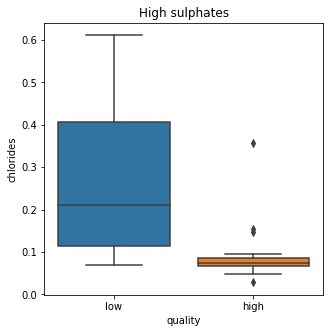

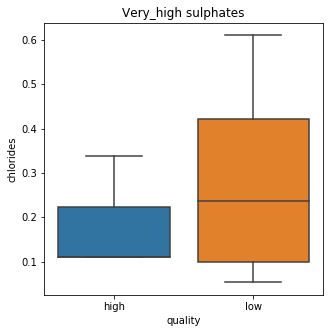

In [11]:
mask = df['quality'].isnull()
low = df['sulphates'] == 'low'
medium = df['sulphates'] == 'medium'
high = df['sulphates'] == 'high'
very_high = df['sulphates'] == 'very_high'

# define axis and labels 
plt.figure(figsize=(5, 5))
sns.boxplot(y="chlorides", x="quality", data=df[df.columns][low & ~mask])
plt.title('Low sulphates')
plt.figure(figsize=(5, 5))
sns.boxplot(y="chlorides", x="quality", data=df[df.columns][medium & ~mask])
plt.title('Medium sulphates')
plt.figure(figsize=(5, 5))
sns.boxplot(y="chlorides", x="quality", data=df[df.columns][high & ~mask])
plt.title('High sulphates')
plt.figure(figsize=(5, 5))
sns.boxplot(y="chlorides", x="quality", data=df[df.columns][very_high & ~mask])
plt.title('Very_high sulphates')
plt.show()

<font color="orange">
    It can be learned that chlorides measure does not differ for samples having low and medium sulphates. But it does for other samples. Second group also have greater variance.
</font>

Plot Histogram for "free sulphor dioxide" for hight and low quailty with the distinction of juice type. 

<Figure size 432x288 with 0 Axes>

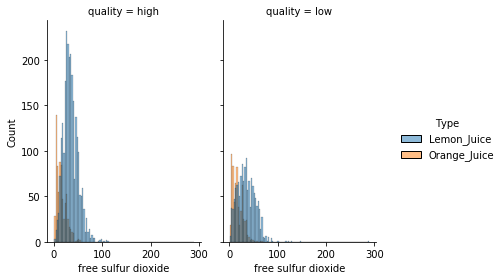

<Figure size 720x720 with 0 Axes>

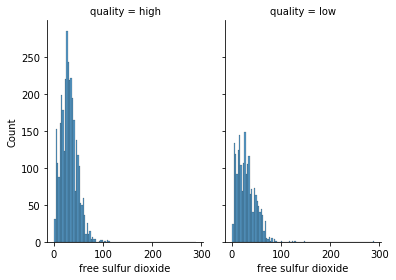

<Figure size 720x720 with 0 Axes>

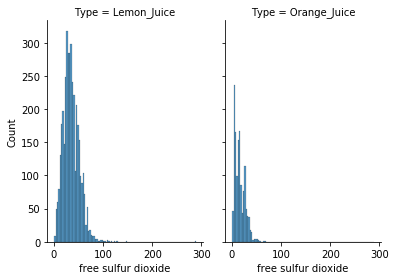

In [12]:
mask = (df['quality'].isnull()) | (df['Type'].isnull())
plt.figure()
sns.displot(data=df[~mask], x="free sulfur dioxide", hue="Type", col="quality",kind="hist", height=4, aspect=.7)
plt.figure(figsize=((10, 10)))
sns.displot(data=df[~mask], x="free sulfur dioxide", col="quality",kind="hist", height=4, aspect=.7)
plt.figure(figsize=((10, 10)))
sns.displot(data=df[~mask], x="free sulfur dioxide", col="Type",kind="hist", height=4, aspect=.7)
plt.show()

Plot heat map for the first 12 column. Compare the correlation between features. 

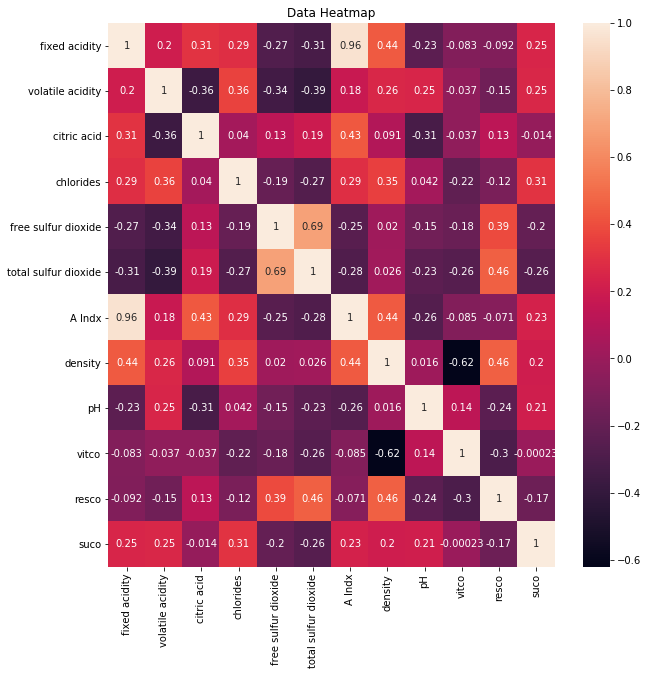

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(pd.concat((dff, df[['vitco', 'resco', 'suco']]), axis=1).corr(), annot=True);
plt.title("Data Heatmap")
plt.show()
# vitco: Vit Indx encoded in 0,1,2,..
# resco: Residual Sugar .....
# suco: Sulphates .....

<font color="orange">
    Above results suggest we could omit A Indx or fixed acidity since their correlation is almost 1
</font>

In [14]:
# Here we split data into train(75%) and test(25%)
from sklearn.model_selection import train_test_split
mask = ~df['target'].isnull()
X = df[df.columns[[0, 1, 2, 4, 5, 6, 7, 8, 9, 16, 17, 18, 19, 20, 21, 22]]][mask]
y = df['target'][mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1000)

## Part 3 AdaBoost
Use a 5-fold cross validaiton to tune parameters. Utilize DecisionTreeClassifier for the base classifier.
 max_depth must be chosen from {1,3,5} and n_estimators are chosen from {10,50,100,200}. 

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

def get_models():
    # Defining parameters:
    nTrees = [10, 50, 100, 200]
    mDepth = [1, 3, 5]
    # A dictionary for models with different params:
    models = dict()
    for n in nTrees:
        for m in mDepth:
            models[str(n) + '_' + str(m)] = AdaBoostClassifier(DecisionTreeClassifier(max_depth=m), n_estimators=n)
    return models

def model_evaluation(X, y, model):
    
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return np.mean(scores)

models = get_models()
bestScore = 0
bestModel = 0
bestModelName = 0

for name, model in models.items():
    score = model_evaluation(X_train, y_train, model)
    if score > bestScore:
        bestScore = score
        bestModel = model
        bestModelName = name

print("best params:")
print("n_estimators: ", bestModelName.split('_')[0])
print("max_depth: ", bestModelName.split('_')[1])

best params:
n_estimators:  200
max_depth:  5


Report F1 score, accuracy and Confusion matrix for the optimum paramters. 

In [16]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=200)
y_pred = model.fit(X_train, y_train).predict(X_test)
print("F1 Score: ", f1_score(y_test, y_pred))
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

F1 Score:  0.8182323513062812
Accuracy:  0.7649173256649893
Confusion matrix: 
 [[328 187]
 [140 736]]


Plot the two-class decision scores. Use the decision_function of you classifier. 

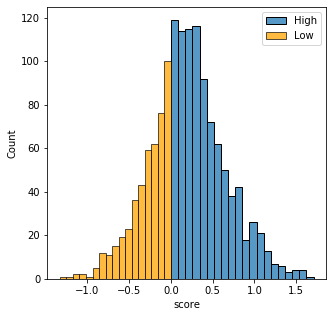

In [17]:
import seaborn as sns
a = model.decision_function(X_test)
plt.figure(figsize=(5, 5))
sns.histplot(x=a[y_pred == 1], label="High")
sns.histplot(x=a[y_pred == 0], color = "orange", label="Low")
plt.legend()
plt.xlabel("score")
plt.show()

## Part 4 (SVM)
In this part we are going to feed the preprocessed data (like previous parts) into a SVM classifier. Before that, let us try SVM on a toy dataset (2D), which illustrates two concentric circles, and draw its decision boundries. This is to get a better feeling of how SVM with a kernel function separates nonlinear data. Necessary libraries are imported below. Google them to find out how they are used.
### Plotting Decision Boundries

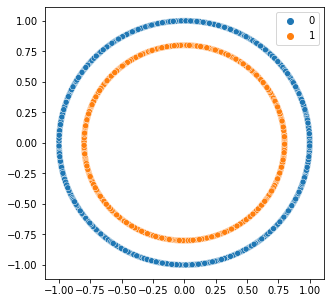

In [18]:
from sklearn.datasets.samples_generator import make_circles
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
# also add the rest of your imports here
X, y = make_circles(1000)
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

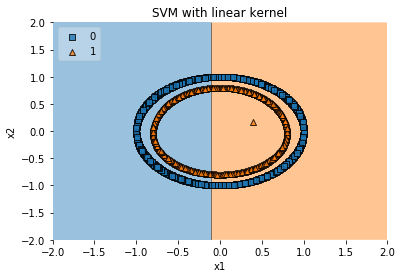

In [19]:
# SVM with Linear Kernel:
X[0, 0] = 0.4 # Adding some outlier, removing this will lead to incorrect plot!
svm = SVC(C=0.1, kernel='linear', gamma='auto')
svm.fit(X, y)


# Plotting decision regions
plot_decision_regions(X=X, y=y, clf=svm, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM with linear kernel')
plt.show()

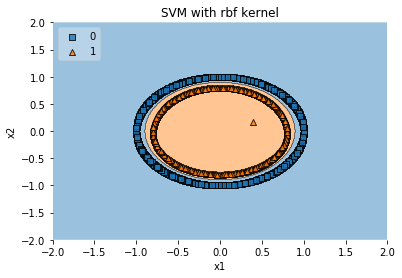

In [20]:
# SVM with RBF Kernel:
svm = SVC(C=0.5, kernel='rbf', gamma='scale')
svm.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM with rbf kernel')
plt.show()

### Hyperparameter Tuning
There are a wide variety of kernel functions like linear, poly, rbf, and sigmoid. Besides, we need to decide what the value of C (regularization parameter in soft-margin SVM) should be. In case of rbf, there is yet another parameter $\gamma$ that needs to be determined. 

$$Kernel Function \in \{linear, poly, rbf, sigmoid\}$$

$$C \in \{0.1, 1, 10, 100, 1000, 10000\}$$

$$\gamma \in \{0.001, 0.01, 0.1\}$$

Write a function (however you wish) to try all possible combinations (36 overall). Sort them based on their $F_1$ Score, and print them similar to the line below:

Print: #(rank), Classifier, $F_1$ Score, Accuracy, Precision, C, $\gamma$ (empty or NAN if not applicable)<br><br>
Draw the confusion matrix only for the best classifier. 
Please also note that 5-fold cross-validation must be used to estimate the scores.


In [21]:
from sklearn.model_selection import train_test_split
dfff = dff.copy()
mapping = {'very_low':0, 'low':1, 'medium':2, 'high':3, 'very_high':4}
dfff['Vit Indx'] = dfff['Vit Indx'].map(mapping)
dfff['residual sugar'] = dfff['residual sugar'].map(mapping)
dfff['sulphates'] = dfff['sulphates'].map(mapping)
dfff['quality'] = dfff['quality'].map({'high':1.0, 'low':0.0})
mask = ~dfff['quality'].isnull()
X = dfff[dfff.columns[1:12]][mask]
y = dfff['quality'][mask]

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

C = [0.1 , 1]

d = pd.DataFrame(data=np.zeros((8, 6)), columns=["Classifier", "F1_Score", "Accuracy", "Precision", "C", "gamma"])
i = 0
# 'linear':
for c in C:
    model = SVC(kernel='linear', C = c)
    y_pred = cross_val_predict(model, X, y, cv=5)
    d.loc[i] = ['Linear', f1_score(y, y_pred), accuracy_score(y, y_pred), 
               precision_score(y, y_pred), c, np.nan]
    i += 1

In [23]:
i = 2
# 'poly':
for c in C:
    model = SVC(kernel='poly', C = c, gamma='scale', degree=3)
    y_pred = cross_val_predict(model, X, y, cv=5)
    d.loc[i] = ['poly', f1_score(y, y_pred), accuracy_score(y, y_pred), 
                precision_score(y, y_pred), c, 'scale']
    i += 1

In [24]:
i = 4
# 'rbf':
for c in C:
    model = SVC(kernel='rbf', C = c, gamma=0.01)
    y_pred = cross_val_predict(model, X, y, cv=5)
    d.loc[i] = ['rbf', f1_score(y, y_pred), accuracy_score(y, y_pred), 
               precision_score(y, y_pred), c, 0.01]
    i += 1

In [25]:
i = 6
# 'sigmoid':
for c in C:
    model = SVC(kernel='sigmoid', C = c, gamma='scale')
    y_pred = cross_val_predict(model, X, y, cv=5)
    d.loc[i] = ['sigmoid', f1_score(y, y_pred), accuracy_score(y, y_pred), 
               precision_score(y, y_pred), c, 'scale']
    i += 1

In [26]:
d.sort_values(by="F1_Score", ascending=False, inplace=True)
d

,Classifier,F1_Score,Accuracy,Precision,C,gamma
0,Linear,0.791025,0.711201,0.731003,0.1,NaN
1,Linear,0.790265,0.714610,0.740112,1.0,NaN
3,poly,0.776508,0.634903,0.634665,1.0,scale
2,poly,0.776277,0.634416,0.634356,0.1,scale
4,rbf,0.775301,0.636688,0.637866,0.1,0.01
5,rbf,0.772133,0.674513,0.694399,1.0,0.01
6,sigmoid,0.674751,0.581981,0.666085,0.1,scale
7,sigmoid,0.666411,0.576623,0.666070,1.0,scale


In [27]:
from sklearn.metrics import confusion_matrix
model = SVC(kernel='linear', C = 0.1)
y_pred = cross_val_predict(model, X, y, cv=5)
confusion_matrix(y, y_pred)

array([[1014, 1239],
       [ 540, 3367]], dtype=int64)

### Hard Voting Classifiers

Briefly explain what hard voting (aka majority voting) is. Then perform this classification using Logistic Regression, Decision Trees, and SVM. For more information, visit:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

<font color="orange">
    When we have equally well performing models we combine their results to cover each model's weaknesses. Assume we have three classifiers and their output for a sample is:
    <br />
    classifier1: class 1
    <br />
    classifier2: class 1
    <br />
    classifier3: class 2
    <br />
Since the class 1 is the majority we'll output 1 as the final output.
</font>

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

clf1 = LogisticRegression(random_state=1, solver='lbfgs', max_iter=2000)
clf2 = DecisionTreeClassifier(random_state=0, max_depth=5)
clf3 = SVC(kernel='rbf', C=0.1, gamma=0.01)
eclf = VotingClassifier(
         estimators=[('lr', clf1), ('dt', clf2), ('rbf', clf3)],
         voting='hard')
y_pred1 = cross_val_predict(clf1, X, y, cv=5)
y_pred2 = cross_val_predict(clf2, X, y, cv=5)
y_pred3 = cross_val_predict(clf3, X, y, cv=5)
y_pred4 = cross_val_predict(eclf, X, y, cv=5)
print("LR F1 Score: ", f1_score(y, y_pred1))
print("DTree F1 Score: ", f1_score(y, y_pred2))
print("rbf F1 Score: ", f1_score(y, y_pred3))
print("VotingClassifier F1 Score: ", f1_score(y, y_pred4))

LR F1 Score:  0.7860815496831282
DTree F1 Score:  0.7734092084842215
rbf F1 Score:  0.7753012048192771
VotingClassifier F1 Score:  0.7990783410138248


<font color="orange">
    Above results show that VotingClassifier has a better F1 score(at least for our case)
</font>

### Convex Optimization

We are going to very briefly and easily look at how we go about solving optimization problems that we encounter when solving SVM. Here we use the same quadratic programming (use solvers.qp()) present in the theory problem set 3. Verify your theoretical solutions with Python code.

https://cvxopt.org/


$$min\hspace{3mm} J = (x_1-6)^2+(x_2-6)^2$$

$$s.\hspace{1mm} to \hspace{3mm}2 x_1+4 x_2 \leq 28$$

$$5 x_1 + 5 x_2 \leq 50$$

$$x_1 \leq 8$$

$$x_2 \leq 6$$

$$x_1 \geq 0$$

$$x_2 \geq 0$$

<div>
<font color="orange">
    First let's standardize equation in form of a QP:
    $$min\hspace{3mm} \frac{1}{2}x^TPx+q^Tx$$
    $$s.\hspace{1mm} to \hspace{3mm} Gx \leq h$$
    $$Ax = b$$
    <br />
    Expanding $J$ yields:
    $$J = x_1^2 + x_2^2 - 12x_1 - 12x_2 + 72$$
    Ignoring the constant, we have:
    $$J = x_1^2 + x_2^2 - 12x_1 - 12x_2$$
    And thus:
    $$
P = 
\begin{bmatrix} 
2 & 0  \\
0 & 2 \\
\end{bmatrix}
\quad
$$
<br />
$$
q = 
\begin{bmatrix} 
-12\\
-12\\
\end{bmatrix}
\quad
$$
<br />
$$
G = 
\begin{bmatrix}
5&5\\
1&0\\
0&1\\
-1&0\\
0&-1\\
\end{bmatrix}
\quad
$$
<br />
$$
h = 
\begin{bmatrix}
50\\
8\\
6\\
0\\
0\\
\end{bmatrix}
\quad
$$
</font>
</div>

In [29]:
from cvxopt import matrix, solvers
P = matrix(np.array([[2, 0], [0, 2]]).astype('float'))
q = matrix(np.array([-12, -12]).astype('float'), (2, 1))
G = matrix(np.array([2, 5, 1, 0, -1, 0, 4, 5, 0, 1, 0, -1]).astype('float'), (6, 2))
h = matrix(np.array([28, 50, 8, 6, 0, 0]).astype('float'), (6, 1))
sol=solvers.qp(P, q, G, h)
print("\nOptimal solution:\n", sol['x'])
print("min J = ", (sol['x'][0] - 6)**2 + (sol['x'][1]-6)**2)

     pcost       dcost       gap    pres   dres
 0: -6.9364e+01 -9.8457e+01  7e+01  7e-02  4e+00
 1: -6.8205e+01 -7.5087e+01  7e+00  3e-03  2e-01
 2: -6.8712e+01 -6.8986e+01  3e-01  6e-05  4e-03
 3: -6.8799e+01 -6.8802e+01  3e-03  7e-07  4e-05
 4: -6.8800e+01 -6.8800e+01  3e-05  7e-09  4e-07
 5: -6.8800e+01 -6.8800e+01  3e-07  7e-11  4e-09
Optimal solution found.

Optimal solution:
 [ 5.20e+00]
[ 4.40e+00]

min J =  3.200000087541364


$$min\hspace{3mm} J = x_2^2$$

$$s.\hspace{1mm} to \hspace{3mm}x_1+x_2 \leq 10$$

$$x_1 \geq 0$$

$$x_1 \leq 5$$

<div>
<font color="orange">
$$
P = 
\begin{bmatrix} 
0 & 0  \\
0 & 2 \\
\end{bmatrix}
\quad
$$
<br />
$$
q = 
\begin{bmatrix} 
0\\
0\\
\end{bmatrix}
\quad
$$
<br />
$$
G = 
\begin{bmatrix}
1&1\\
-1&0\\
1&0\\
\end{bmatrix}
\quad
$$
<br />
$$
h = 
\begin{bmatrix}
10\\
0\\
5\\
\end{bmatrix}
\quad
$$
</font>
</div>

In [30]:
from cvxopt import matrix, solvers
P = matrix(np.array([[0, 0], [0, 2]]).astype('float'))
q = matrix(np.array([0, 0]).astype('float'), (2, 1))
G = matrix(np.array([1, -1, 1, 1, 0, 0]).astype('float'), (3, 2))
h = matrix(np.array([10, 0, 5]).astype('float'), (3, 1))
sol=solvers.qp(P, q, G, h)
print("\nOptimal solution:\n", sol['x'])
print("min J = ", sol['x'][1]**2)

     pcost       dcost       gap    pres   dres
 0:  3.5156e+00 -9.9219e+00  1e+01  0e+00  8e+00
 1:  3.2006e-05 -8.9857e-01  9e-01  2e-16  2e-01
 2:  3.2562e-09 -8.9932e-03  9e-03  2e-16  2e-03
 3:  3.2562e-13 -8.9932e-05  9e-05  2e-16  2e-05
 4:  3.2562e-17 -8.9932e-07  9e-07  1e-16  2e-07
 5:  3.2562e-21 -8.9932e-09  9e-09  8e-17  2e-09
Optimal solution found.

Optimal solution:
 [ 4.43e+00]
[ 5.71e-11]

min J =  3.256185311707637e-21


Thank you!

![alt text](https://drive.google.com/uc?export=view&id=1Sgj1xm4M9fkcxA7nRYU_TNB1qjzgQD-T)